In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

### Data

In [39]:
train_data_dir = "chest_xray/train"
test_data_dir = "chest_xray/test"
val_data_dir = "chest_xray/val"

# data normalization
idg = ImageDataGenerator(rescale=1./255)

train_generator = idg.flow_from_directory(train_data_dir, color_mode = 'grayscale',
                                          target_size =(128, 128),
                                          batch_size = 32,
                                          class_mode = 'binary')
test_generator = idg.flow_from_directory(test_data_dir, color_mode = 'grayscale',
                                        target_size =(128,128),
                                        batch_size = 32,
                                        class_mode = 'binary')
valid_generator = idg.flow_from_directory(val_data_dir, color_mode = 'grayscale',
                                         target_size = (128, 128),
                                         batch_size = 32,
                                         class_mode = 'binary')

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [50]:
print(train_images.shape)
test_images.shape

(32, 128, 128, 1)


(32, 128, 128, 1)

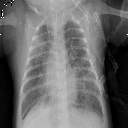

In [40]:
# Preview of an image
array_to_img(train_images[5])

In [42]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

### Model

In [31]:
model_1 = Sequential()

model_1.add(Conv2D(32,1, activation = 'relu', input_shape = (128, 128, 1)))

model_1.add(MaxPool2D(pool_size = 2))

model_1.add(Conv2D(32, 1, activation = 'relu'))

model_1.add(MaxPool2D(pool_size = 3))

model_1.add(Flatten())

model_1.add(Dense(100, activation = 'relu'))

model_1.add(Dense(1, activation='sigmoid'))

In [32]:
print(model_1.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 32)        1056      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 14112)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               1411300   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [33]:
model_1.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [34]:
callback = EarlyStopping(monitor='val_loss', patience=5, min_delta=3)

In [44]:
results_1 =model_1.fit(train_generator, validation_data=valid_generator, epochs=3, batch_size=32, callbacks=callback)

Epoch 1/3
163/163 [==============================] - 51s 309ms/step - loss: 0.3839 - accuracy: 0.8171 - val_loss: 1.0742 - val_accuracy: 0.5000
Epoch 2/3
163/163 [==============================] - 50s 309ms/step - loss: 0.1685 - accuracy: 0.9346 - val_loss: 0.7205 - val_accuracy: 0.6250
Epoch 3/3
163/163 [==============================] - 48s 295ms/step - loss: 0.1018 - accuracy: 0.9617 - val_loss: 0.2025 - val_accuracy: 0.9375


### Evaluation

In [36]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

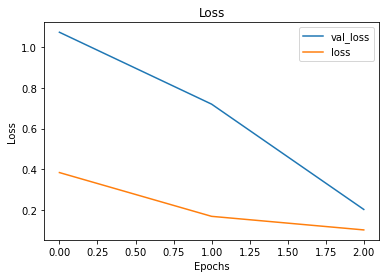

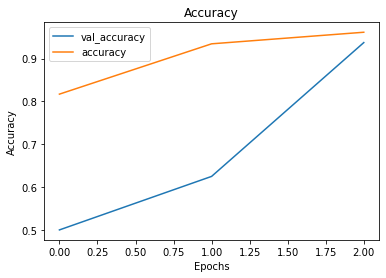

In [45]:
visualize_training_results(results_1)

In [46]:
model_1.evaluate(test_generator)

20/20 [==============================] - 4s 213ms/step - loss: 0.6137 - accuracy: 0.8013


[0.6136809587478638, 0.8012820482254028]

In [47]:
# how do I eveluate the wrong classifications to try to figure out why these were misclassified

### Model Tuning